<a href="https://colab.research.google.com/github/wirelesshydra/Text-Generator/blob/main/LSTM_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from numpy import array
from pickle import dump
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding

In [2]:
# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

In [3]:
# load document
in_filename = 'ram.txt'
doc = load_doc(in_filename)
print(doc[:201])

Chapter 1 


3400 BCE, somewhere near the Godavari River, India 

Ram crouched low as he bent his tall, lean and muscular frame. He rested his weight on 
his right knee as he held the bow steady. The a


In [4]:
import string

# turn a doc into clean tokens
def clean_doc(doc):
	# replace '--' with a space ' '
	doc = doc.replace('--', ' ')
	# split into tokens by white space
	tokens = doc.split()
	# remove punctuation from each token
	table = str.maketrans('', '', string.punctuation)
	tokens = [w.translate(table) for w in tokens]
	# remove remaining tokens that are not alphabetic
	tokens = [word for word in tokens if word.isalpha()]
	# make lower case
	tokens = [word.lower() for word in tokens]
	return tokens

In [5]:
# clean document
tokens = clean_doc(doc)
print(tokens[:200])
print('Total Tokens: %d' % len(tokens))
print('Unique Tokens: %d' % len(set(tokens)))

['chapter', 'bce', 'somewhere', 'near', 'the', 'godavari', 'river', 'india', 'ram', 'crouched', 'low', 'as', 'he', 'bent', 'his', 'tall', 'lean', 'and', 'muscular', 'frame', 'he', 'rested', 'his', 'weight', 'on', 'his', 'right', 'knee', 'as', 'he', 'held', 'the', 'bow', 'steady', 'the', 'arrow', 'was', 'fixed', 'in', 'place', 'but', 'he', 'knew', 'that', 'the', 'bowstring', 'should', 'not', 'be', 'pulled', 'too', 'early', 'he', 'want', 'his', 'muscles', 'to', 'tire', 'out', 'he', 'had', 'to', 'wait', 'for', 'the', 'perfect', 'moment', 'it', 'must', 'be', 'a', 'clean', 'strike', 'moving', 'dada', 'whispered', 'lakshman', 'to', 'his', 'elder', 'brother', 'ram', 'reply', 'his', 'eyes', 'were', 'fixed', 'on', 'the', 'target', 'a', 'light', 'breeze', 'played', 'with', 'the', 'few', 'strands', 'of', 'hair', 'that', 'had', 'escaped', 'the', 'practical', 'bun', 'atop', 'his', 'head', 'his', 'shaggy', 'unkempt', 'beard', 'and', 'his', 'white', 'dhoti', 'gently', 'fluttered', 'in', 'the', 'breez

In [6]:
# organize into sequences of tokens
length = 50 + 1
sequences = list()
for i in range(length, len(tokens)):
	# select sequence of tokens
	seq = tokens[i-length:i]
	# convert into a line
	line = ' '.join(seq)
	# store
	sequences.append(line)
print('Total Sequences: %d' % len(sequences))

Total Sequences: 86257


In [7]:
# save tokens to file, one dialog per line
def save_doc(lines, filename):
	data = '\n'.join(lines)
	file = open(filename, 'w')
	file.write(data)
	file.close()

In [8]:

# save sequences to file
out_filename = 'republic_sequences.txt'
save_doc(sequences, out_filename)

In [9]:
# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

# load
in_filename = 'republic_sequences.txt'
doc = load_doc(in_filename)
lines = doc.split('\n')

In [10]:
# integer encode sequences of words

from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(lines)
sequences = tokenizer.texts_to_sequences(lines)

In [11]:
# vocabulary size
vocab_size = len(tokenizer.word_index) + 1

In [12]:
# separate into input and output
from random import shuffle
sequences = array(sequences)
X, y = sequences[:,:-1], sequences[:,-1]
y = to_categorical(y, num_classes=vocab_size)
seq_length = X.shape[1]

In [13]:
from sklearn.model_selection import train_test_split
import numpy
seed = 7
numpy.random.seed(seed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)

In [14]:
# define model
from keras.layers import Dropout
model = Sequential()
model.add(Embedding(vocab_size, 50, input_length=seq_length))
model.add(LSTM(256, return_sequences=True))
model.add(LSTM(256))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(vocab_size, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 50)            409900    
_________________________________________________________________
lstm (LSTM)                  (None, 50, 256)           314368    
_________________________________________________________________
lstm_1 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense (Dense)                (None, 256)               65792     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 8198)              2106886   
Total params: 3,422,258
Trainable params: 3,422,258
Non-trainable params: 0
______________________________________________

In [15]:

# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [16]:
from matplotlib import pyplot

history = model.fit(X_train, y_train, batch_size=128,epochs=100,validation_data=(X_test,y_test))


Epoch 1/100
452/452 [==============================] - 14s 31ms/step - loss: 6.8408 - accuracy: 0.0640 - val_loss: 6.6559 - val_accuracy: 0.0682
Epoch 2/100
452/452 [==============================] - 13s 30ms/step - loss: 6.4615 - accuracy: 0.0712 - val_loss: 6.5671 - val_accuracy: 0.0790
Epoch 3/100
452/452 [==============================] - 13s 30ms/step - loss: 6.2772 - accuracy: 0.0779 - val_loss: 6.5278 - val_accuracy: 0.0811
Epoch 4/100
452/452 [==============================] - 13s 30ms/step - loss: 6.1492 - accuracy: 0.0810 - val_loss: 6.4991 - val_accuracy: 0.0848
Epoch 5/100
452/452 [==============================] - 13s 30ms/step - loss: 6.0136 - accuracy: 0.0903 - val_loss: 6.4535 - val_accuracy: 0.0897
Epoch 6/100
452/452 [==============================] - 13s 30ms/step - loss: 5.9139 - accuracy: 0.0978 - val_loss: 6.4690 - val_accuracy: 0.0945
Epoch 7/100
452/452 [==============================] - 13s 30ms/step - loss: 5.7955 - accuracy: 0.1043 - val_loss: 6.4695 - val_ac

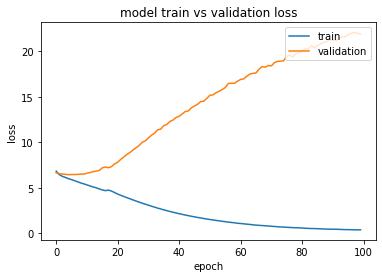

In [17]:
# plot train and validation loss
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train','validation'], loc='upper right')
pyplot.show()

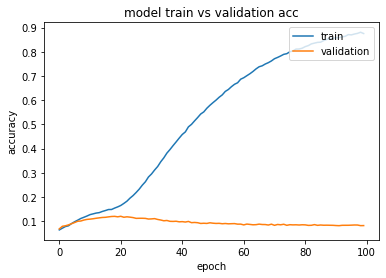

In [18]:
pyplot.plot(history.history['accuracy'])
pyplot.plot(history.history['val_accuracy'])
pyplot.title('model train vs validation acc')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In [19]:

# save the model to file
model.save('model.h5')
# save the tokenizer
dump(tokenizer, open('tokenizer.pkl', 'wb'))

In [20]:
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text
 
# load cleaned text sequences
in_filename = 'republic_sequences.txt'
doc = load_doc(in_filename)
lines = doc.split('\n')

In [21]:
seq_length = len(lines[0].split()) - 1

In [22]:
# load the model
from keras.models import load_model
from pickle import dump
model = load_model('model.h5')

In [23]:
from random import randint
from pickle import load
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences
 

 
# generate a sequence from a language model
def generate_seq(model, tokenizer, seq_length, seed_text, n_words):
	result = list()
	in_text = seed_text
	# generate a fixed number of words
	for _ in range(n_words):
		# encode the text as integer
		encoded = tokenizer.texts_to_sequences([in_text])[0]
		# truncate sequences to a fixed length
		encoded = pad_sequences([encoded], maxlen=seq_length, truncating='pre')
		# predict probabilities for each word
		yhat = model.predict_classes(encoded, verbose=0)
		# map predicted word index to word
		out_word = ''
		for word, index in tokenizer.word_index.items():
			if index == yhat:
				out_word = word
				break
		# append to input
		in_text += ' ' + out_word
		result.append(out_word)
	return ' '.join(result)
 


In [24]:
# load cleaned text sequences
in_filename = 'republic_sequences.txt'
doc = load_doc(in_filename)
lines = doc.split('\n')
seq_length = len(lines[0].split()) - 1
 
# load the model
model = load_model('model.h5')
 
# load the tokenizer
tokenizer = load(open('tokenizer.pkl', 'rb'))
 


In [25]:
# select a seed text
seed_text = lines[randint(0,len(lines))]
print(seed_text + '\n')
 


as a dutiful son he would not allow himself even in his own mind to entertain rebellious thoughts against his father lakshman walking a few steps behind was engrossed in the frenetic activities of the jungle shatrughan however was listening in on the conversation with keen interest ram dada is too



In [26]:
# generate new text
generated = generate_seq(model, tokenizer, seq_length, seed_text, 50)
print(generated)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
why would not be happy with his body to your mother he is fourteen years with ram smiled to roshni i think it is not i will come on your ram was a naga a few months will not be spared had to be in the devas but built into


In [27]:
loss, accuracy = model.evaluate(X, y)


2696/2696 [==============================] - 16s 6ms/step - loss: 7.3022 - accuracy: 0.6847


In [28]:
print(loss)
print(accuracy)

7.302230358123779
0.6846516728401184
